Импортировнаие  библиотек  

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib
from scipy import stats
from scipy.stats import norm, skew
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

In [ ]:
df =pd.read_pickle('/content/_my_data (1).pkl')

так как мы парсиили данные , объединияем  их   в один  дата  сет  

In [ ]:
df.tail()# проверяем  нормльно  ли  объединились  дата сеты

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,price,year_of_construction,living_meters,kitchen_meters,phone,district,street,underground,residential_complex,Unnamed: 0
23,Квартет-М,real_estate_agent,https://lobnya.cian.ru/sale/flat/289692571/,Лобня,sale,flat,-1,-1,1,37.8,...,6499999,-1,-1.0,-1.0,+7w+zu8fv7/d3w9u,NaN,NaN,Лобня,NaN,NaN
24,Ключ,real_estate_agent,https://lobnya.cian.ru/sale/flat/289017161/,Лобня,sale,flat,-1,-1,1,37.0,...,6400000,-1,-1.0,-1.0,+7w+zu8fv7/d3w9u,NaN,NaN,Лобня,NaN,NaN
25,Владис,real_estate_agent,https://lobnya.cian.ru/sale/flat/287406033/,Лобня,sale,flat,-1,-1,1,45.2,...,8700000,-1,-1.0,-1.0,+7w+zu8fv7/d3w9u,NaN,NaN,Хлебниково,NaN,NaN
26,Владис,real_estate_agent,https://lobnya.cian.ru/sale/flat/280097887/,Лобня,sale,flat,-1,-1,1,49.9,...,6200000,-1,-1.0,-1.0,+7w+zu8fv7/d3w9u,NaN,NaN,Лобня,NaN,NaN
27,Городские квартиры,real_estate_agent,https://lobnya.cian.ru/sale/flat/290312212/,Лобня,sale,flat,-1,-1,1,38.5,...,6800000,-1,-1.0,-1.0,+7w+zu8fv7/d3w9u,NaN,NaN,Лобня,NaN,NaN


In [ ]:
df.shape # проверяем  размерность (all_data.csv(11000 , 21))

(18037, 21)

In [ ]:
df.info()# смотрим на типы данных колонок и замечаем  пропуски в данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18037 entries, 0 to 27
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                17974 non-null  object 
 1   author_type           17974 non-null  object 
 2   link                  18037 non-null  object 
 3   city                  18037 non-null  object 
 4   deal_type             18037 non-null  object 
 5   accommodation_type    18037 non-null  object 
 6   floor                 18037 non-null  int64  
 7   floors_count          18037 non-null  int64  
 8   rooms_count           18037 non-null  int64  
 9   total_meters          18037 non-null  float64
 10  price_per_m2          18037 non-null  int64  
 11  price                 18037 non-null  int64  
 12  year_of_construction  18037 non-null  int64  
 13  living_meters         18037 non-null  float64
 14  kitchen_meters        18037 non-null  float64
 15  phone                 

Пользуясь  эвристиками  и  нашими априорными  знаниями  про  цено  образование, заключяем , что некоторые  из  колонок  не несут  в себе полезной для  нас  информации  и  могут  создать линейную  зависимость  между  данными (нежелательно)

In [ ]:
df = df.drop(['Unnamed: 0', 'author' , 'author_type' ,   'phone' , 'price' , 'street' , 'floors_count' ], axis=1)

Так как распределение  нашей целевой  переменней  даже  отдалено не  напоминает  нормальное , чтобы  модель  быстрее и  качественней  обучилась(близость  к нулю делает  вычисления более точными)логарифмируем  целевую  переменную и наше распредление  уже напоминает  нормальное  (QQ-plot помогает понять насколько  повлиял  логарифм)

<ipython-input-585-d9b0fd84bac7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_m2'] , fit=norm);



 mu = 488915.18 and sigma = 2233805.06



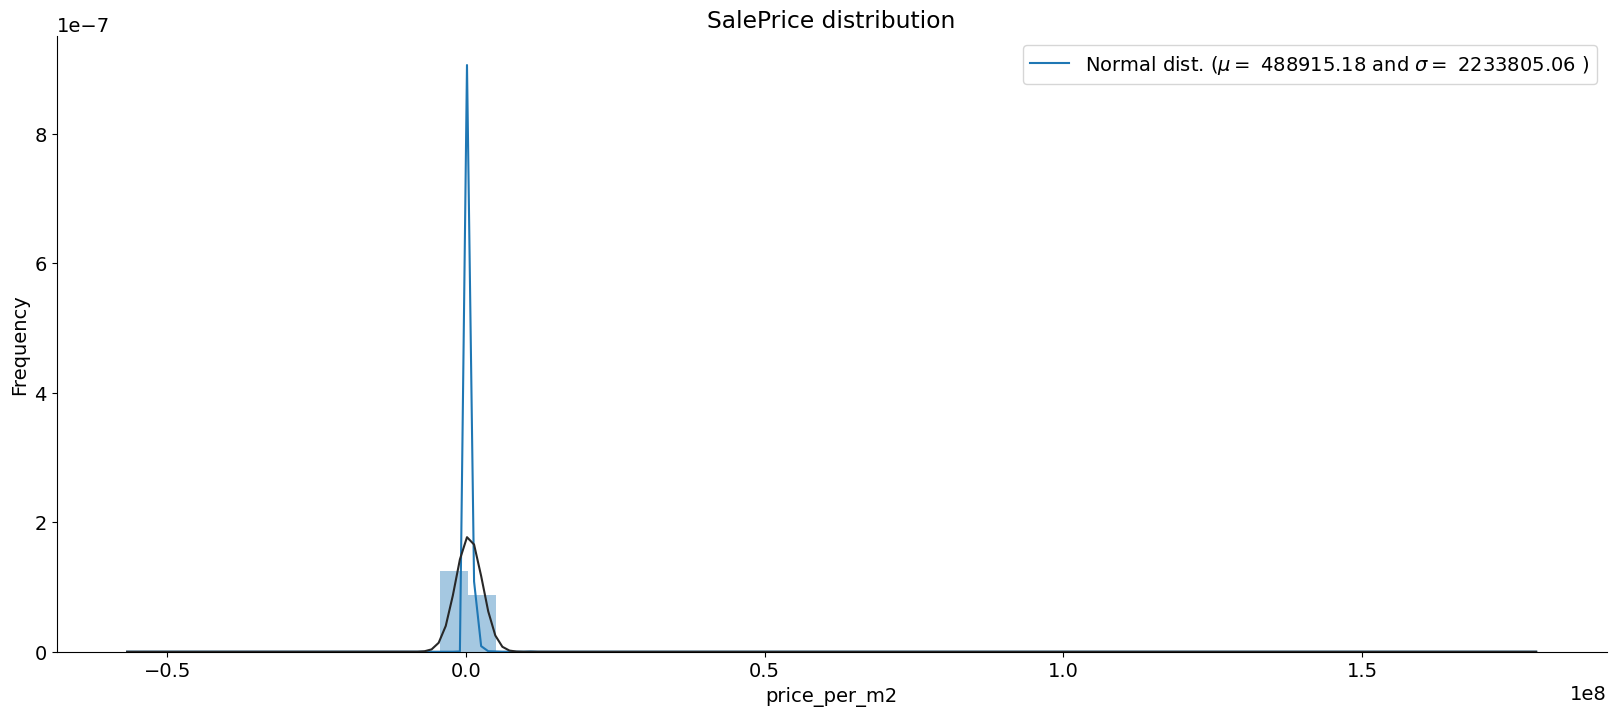

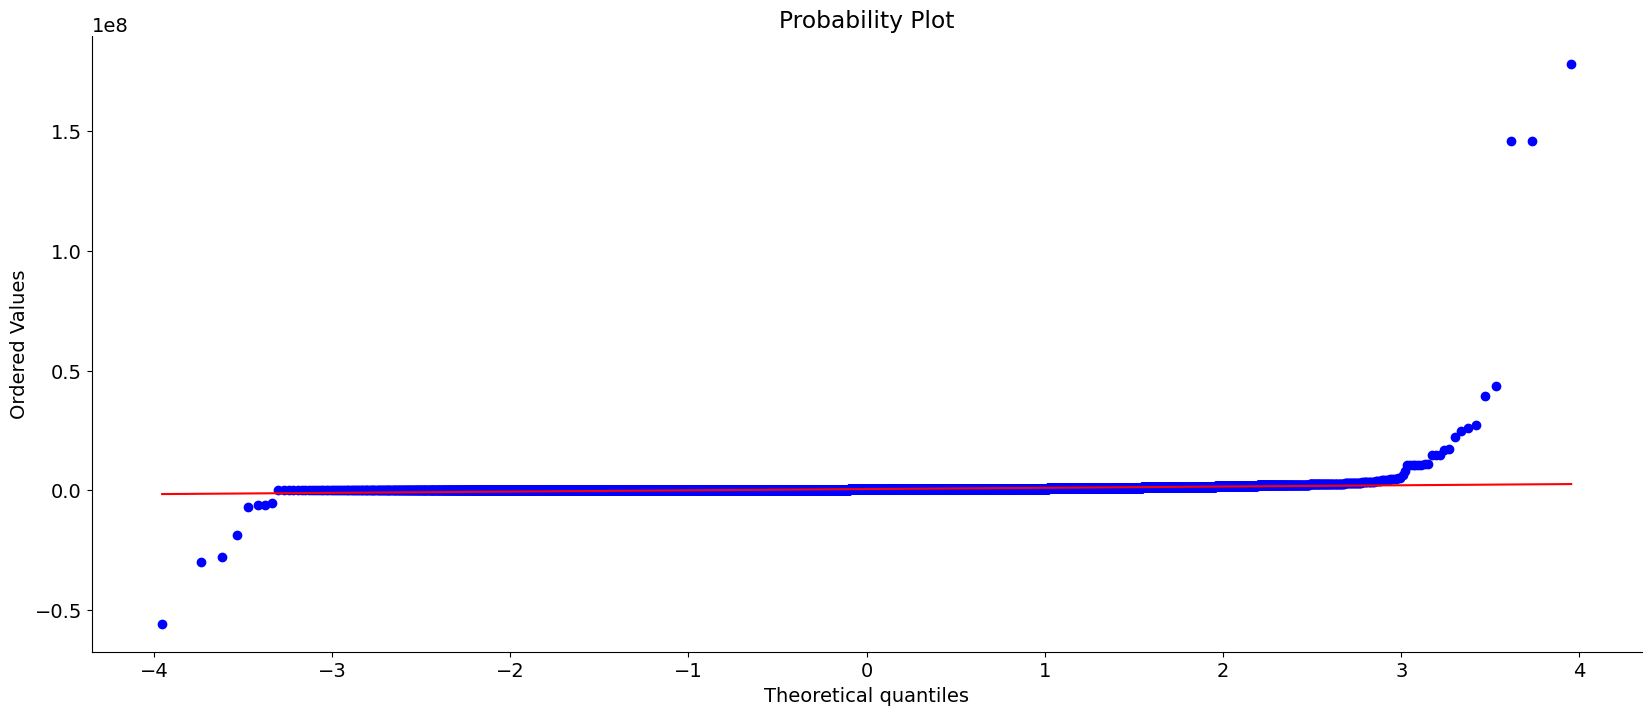

In [ ]:
sns.distplot(df['price_per_m2'] , fit=norm);


(mu, sigma) = norm.fit(df['price_per_m2'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


fig = plt.figure()
res = stats.probplot(df['price_per_m2'], plot=plt)
plt.show()

In [ ]:
def remove_link(elem):
  '''
  Эта  функция будет работать только  на этих  данных
  Так как  ссылка  указывает  на город  обявления  и нам нужна  это информация
  Преобразовываем  ссылку  в  текст
  :param elem: сама ссылка  type(str)
  '''
  elem =elem[8:]
  elem = elem[:elem.find('.')]
  if elem  == 'www':
    elem = 'moskov'
  return elem
df['link'] = df['link'].apply(remove_link)

In [ ]:
df.duplicated().sum()# избавляемся  от линейной  зависимости в данных

3997

In [ ]:
df =df.drop_duplicates()

<Axes: >

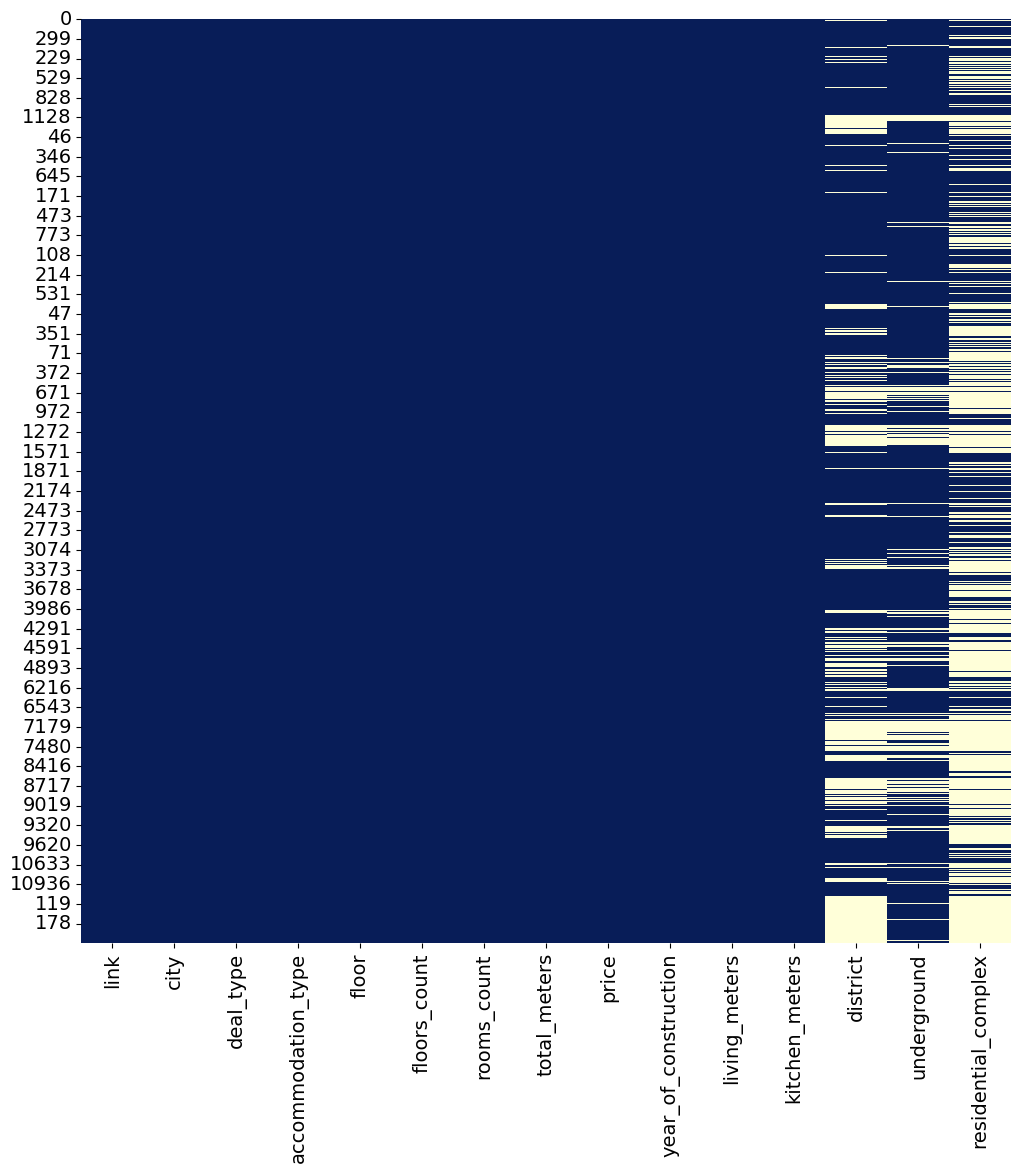

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(df.isnull(),cmap="YlGnBu_r",cbar=False)# визуализируем пропуски  и  смотрим  в каких  именно  колонках  они  есть

In [ ]:
df = df.drop(['residential_complex'], axis=1)# в  этой  колонке больше  50  процентов данных  пропуски  и даже если мы  заполним  их  нулями  ммного  информации она нам не даст
df['district'] = df['district'].fillna('None')
df['underground'] = df['underground'].fillna('None')# все  остальные  колонки  заполняем  значениями  none

In [ ]:
df = df[df['underground'].str.len() <= 26]# в  этой  колонке могут  быть  как  просто названия метро  'Люблино ' , а  может быть  и целый  текст  вроде "Метро  Люблю  10  минут езды на машине  есть парки " мы  обрезаем по средней  длине  всех значений в колонке

In [ ]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})
missing_data# смаотрим на процент пустых  данных  после  нашей обработки

,total_missing,perc_missing
link,0,0.0
city,0,0.0
deal_type,0,0.0
accommodation_type,0,0.0
floor,0,0.0
rooms_count,0,0.0
total_meters,0,0.0
price_per_m2,0,0.0
year_of_construction,0,0.0
living_meters,0,0.0


array([[<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'floors_count'}>,
        <Axes: title={'center': 'rooms_count'}>],
       [<Axes: title={'center': 'total_meters'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year_of_construction'}>],
       [<Axes: title={'center': 'living_meters'}>,
        <Axes: title={'center': 'kitchen_meters'}>, <Axes: >]],
      dtype=object)

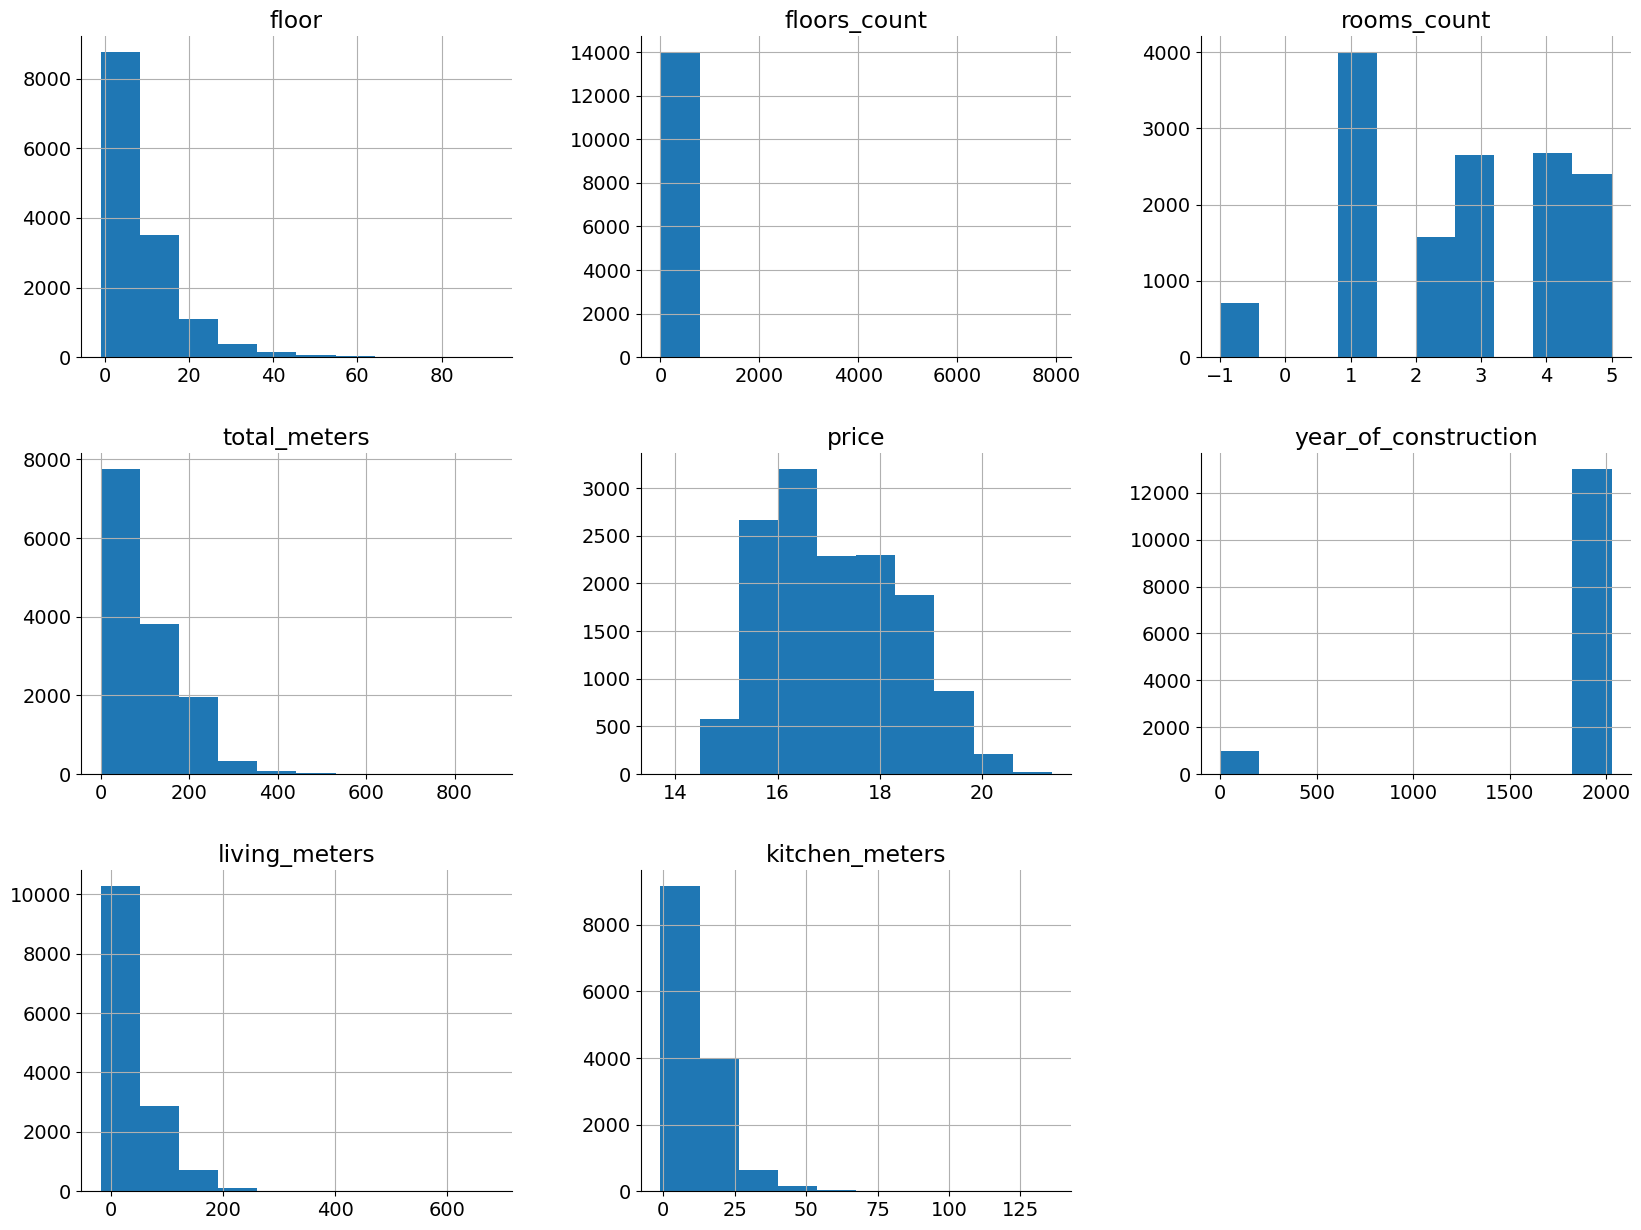

In [ ]:
df.hist(figsize=(20,15))#смотрим  на  распределения не только  целенной  переменной  ,  но  и всех  численных  данных

In [ ]:
df = df.drop(['city' , 'deal_type' , 'accommodation_type' ], axis=1)# значения  в этих  колонках  одинаковые(0  информативности)

Далее  разбираемся  с  аномальными  или  неинформативными  значениями  в данных  

In [ ]:
num = df._get_numeric_data()# в  колонках  всего метро  год  постройки  и  ещё в нескольких  значеняи могут быть отрицательнымы  , так как силкшом  долго  рассматривать  каждый случай  и  разбираться  что  значит  -1  в  годе постройке  мы просто удаляем колонки   сотрицательными значениями
num[num < 0] = 1

In [ ]:
df = df[df.living_meters != 1 ]
df = df[df.kitchen_meters != 1 ]

In [ ]:
df = df[df.year_of_construction != -1 ]
df = df[df.year_of_construction < 2023 ]
df.shape

(8023, 10)

<ipython-input-596-755ea4f25dfa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

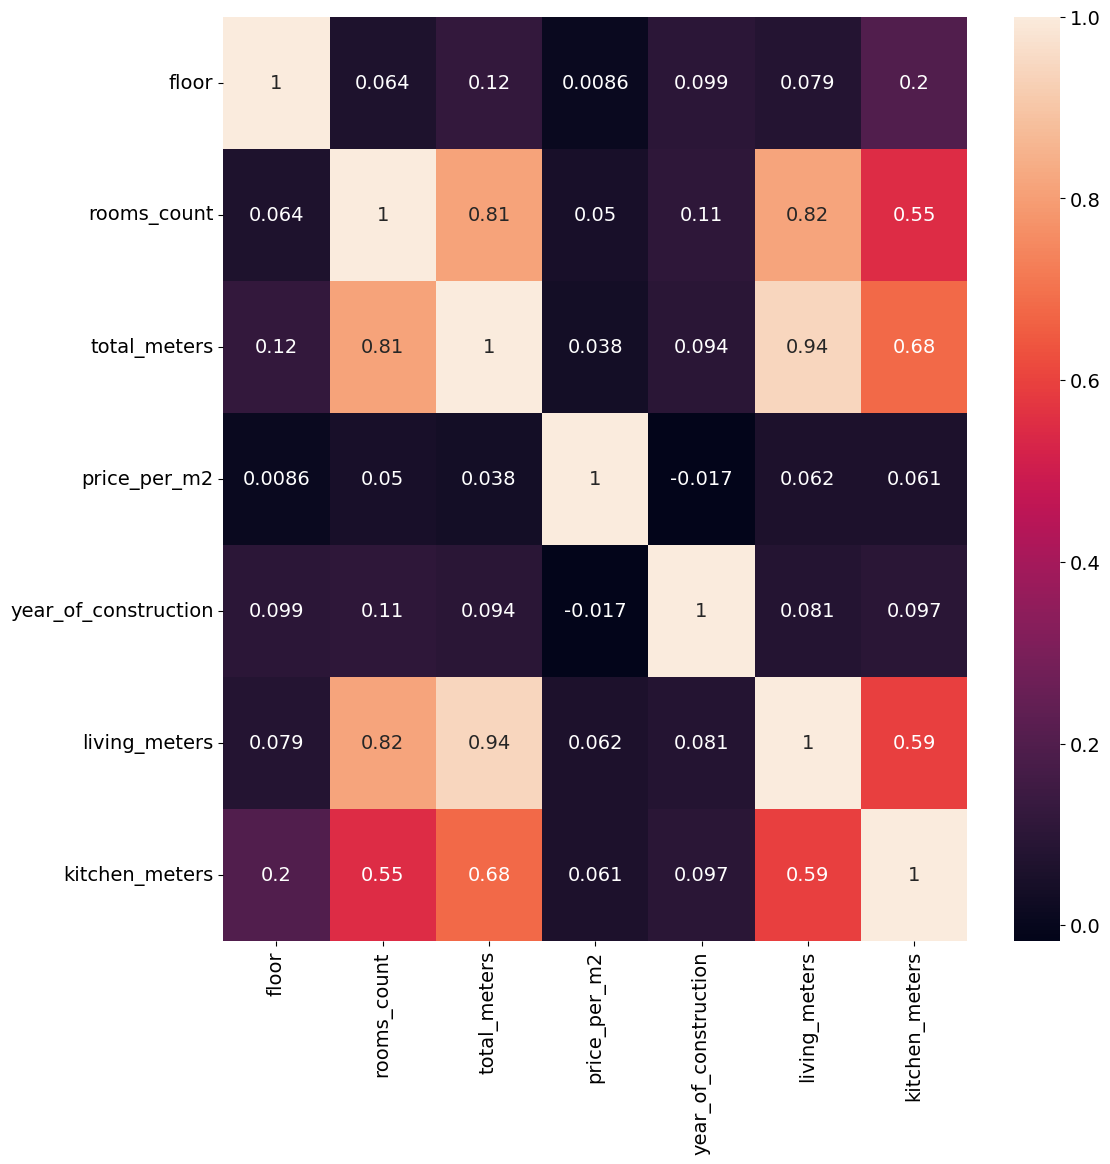

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot=True)

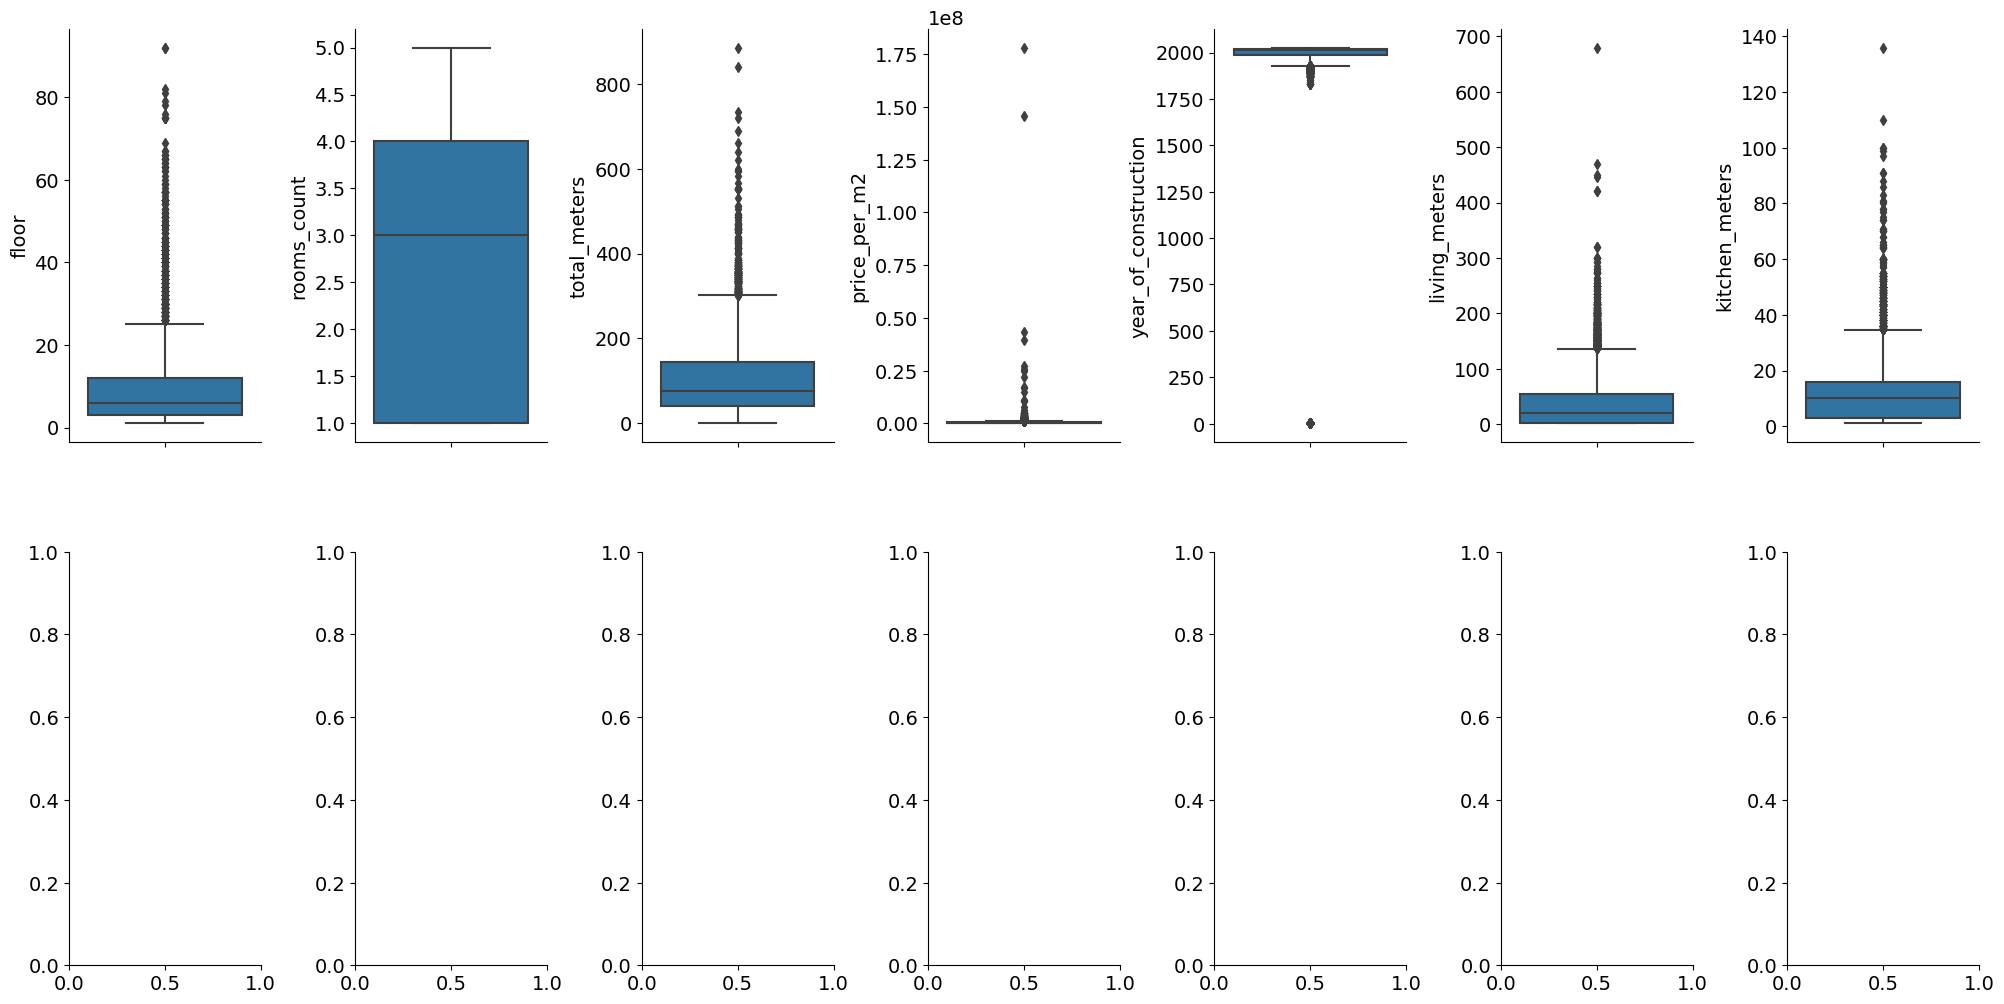

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num.items():
    sns.boxplot(y=k, data=num, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
for k, v in num.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(num)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column floor outliers = 4.90%
Column rooms_count outliers = 0.00%
Column total_meters outliers = 2.08%
Column price_per_m2 outliers = 7.13%
Column year_of_construction outliers = 11.64%
Column living_meters outliers = 4.45%
Column kitchen_meters outliers = 2.80%


In [ ]:
df = df[~(df['price_per_m2'] >= 700000)]
print(np.shape(df))

(7032, 10)


In [ ]:
df = df[~(df['year_of_construction'] <= 1916)]
print(np.shape(df))

(6349, 10)


In [ ]:
df = df[~(df['total_meters'] >= 300)]
print(np.shape(df))

(6283, 10)


In [ ]:
df = df[~(df['living_meters'] >= 170)]
print(np.shape(df))

(6232, 10)


In [ ]:
df = df[~(df['kitchen_meters'] >= 50)]
print(np.shape(df))

(6206, 10)


In [ ]:
!pip  install  catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


При решении  какие  параметры  сильнее всего  влияют на оценку модели  ,  я  обучил  сначала  обычный catboost добавим  колонку  с  рандомными  значениями , которая  полслужила  неким  треш  холдом  по которому  я оценивал значимость  и  после  этого  ненужные  колонки  были  удалены ,  а дата сет  сохранен  в  формате  pickle  , который  я и  загружаю  в начале ноутбука  , но если вам нужны  изначальные  данные для полного повторения  результатов  пишите мне  


In [ ]:

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df['price_per_m2'] = np.log(df['price_per_m2'])

In [ ]:
X = df.drop(columns='price_per_m2')
y = df['price_per_m2']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25  , random_state=42)

In [ ]:
model = CatBoostRegressor(iterations=100000, depth = 10, loss_function='MAE' , learning_rate = 0.059948958418971309,l2_leaf_reg =11 ,   eval_metric="MAE",
                           early_stopping_rounds = 1000 , boosting_type = 'Plain',feature_border_type ="GreedyLogSum" ,
                          boost_from_average = True , model_size_reg = 2 ,
                          subsample =  0.860245768257485 , colsample_bylevel = 0.2813359918917325 , min_data_in_leaf = 50,
                          bootstrap_type = 'MVS' ,  leaf_estimation_method = 'Exact'

                          )
model.fit(X_train , y_train , eval_set=(X_test , y_test),  cat_features=['link' , 'district' 	 , 'underground' ])

y_pred = model.predict(X_test)
MAE= mean_absolute_error(np.exp(y_test), np.exp(y_pred))
MAE

Выходные данные были обрезаны до нескольких последних строк (5000).
4026:	learn: 0.0165648	test: 0.1391199	best: 0.1391054 (4022)	total: 48.1s	remaining: 19m 7s
4027:	learn: 0.0165574	test: 0.1391221	best: 0.1391054 (4022)	total: 48.1s	remaining: 19m 6s
4028:	learn: 0.0165551	test: 0.1391245	best: 0.1391054 (4022)	total: 48.1s	remaining: 19m 6s
4029:	learn: 0.0165521	test: 0.1391236	best: 0.1391054 (4022)	total: 48.2s	remaining: 19m 6s
4030:	learn: 0.0165520	test: 0.1391236	best: 0.1391054 (4022)	total: 48.2s	remaining: 19m 6s
4031:	learn: 0.0165482	test: 0.1391238	best: 0.1391054 (4022)	total: 48.2s	remaining: 19m 6s
4032:	learn: 0.0165479	test: 0.1391236	best: 0.1391054 (4022)	total: 48.2s	remaining: 19m 6s
4033:	learn: 0.0165479	test: 0.1391236	best: 0.1391054 (4022)	total: 48.2s	remaining: 19m 6s
4034:	learn: 0.0165477	test: 0.1391237	best: 0.1391054 (4022)	total: 48.2s	remaining: 19m 6s
4035:	learn: 0.0165395	test: 0.1391265	best: 0.1391054 (4022)	total: 48.2s	remaining: 19m 6s
40

43681.81548537168

In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,total_meters,16.314558
1,link,14.538868
2,living_meters,14.204215
3,district,13.236159
4,year_of_construction,12.375048
5,underground,9.651373
6,kitchen_meters,7.945172
7,floor,7.099927
8,rooms_count,4.634679


In [ ]:
(model.score(X_test, y_test))*100


84.59395981414711

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-665-59e098118b91>:2: RuntimeWarning: overflow encountered in exp
  MAE= mean_absolute_error(np.exp(y_test), np.exp(y_pred))


ValueError: ignored

In [ ]:
np.expm1(y_test)

9423    164369.0
48      188576.0
8929    266665.0
8264    340759.0
9418    172751.0
          ...   
8332    204493.0
2917    374999.0
7211    148147.0
180     443180.0
4652    157141.0
Name: price_per_m2, Length: 1552, dtype: float64

In [ ]:
X_test

,link,floor,rooms_count,total_meters,year_of_construction,living_meters,kitchen_meters,district,underground
9423,moskov,10,3,75.5,1980,45.3,10.3,Ясенево,None
48,moskov,12,3,92.8,2015,49.0,20.0,None,Коммунарка
8929,moskov,3,2,45.0,1968,30.0,7.0,Бутырский,Фонвизинская
8264,moskov,13,2,76.3,2016,26.0,20.0,Крылатское,Кунцевская
9418,odintsovo,15,3,71.2,2014,45.0,9.0,None,Сколково
...,...,...,...,...,...,...,...,...,...
8332,moskov,5,2,44.5,1966,33.7,5.8,Северное Измайлово,Щёлковская
2917,moskov,3,5,160.0,1917,118.0,20.0,Арбат,None
7211,klin,7,1,24.3,2019,16.0,5.0,None,None
180,moskov,14,4,132.0,2008,113.0,14.0,Пресненский,Шелепиха


In [ ]:
Y = ['moskov' ,  '10' , '3' ,'75.5' , '1980' , '45.3' , '10.3' ,  'Куркино', 'Планерная' ]
Y = model.predict(Y)
back = np.exp(Y)
back

241627.68456917975